Not working

In [1]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import  LogicalExpressionOracle
from math import pi, acos, sqrt
from qiskit.tools.visualization import circuit_drawer
from qiskit.aqua.components.initial_states import Custom
from qiskit.aqua.algorithms.single_sample import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
import time

%matplotlib inline

ModuleNotFoundError: No module named 'qiskit.aqua.algorithms.single_sample'

In [ ]:
o=LogicalExpressionOracle(expression= '(~s | ~r)&(~s | w)&(~r | w)&e')
q=o.variable_register

qc=QuantumCircuit(q)
theta0=2.0*acos(sqrt(0.55))
theta1=2.0*acos(sqrt(0.3))
theta2=2.0*acos(sqrt(0.7))
qc.ry(theta0,q[0])
qc.ry(theta1,q[1])
qc.ry(theta2,q[2])
qc.h(q[3])

i=Custom(4,circuit=qc)
c=Grover(o, init_state=i, num_iterations=4)
         
         

In [3]:

cc=c.construct_circuit(measurement=True)


In [4]:
backend = Aer.get_backend('qasm_simulator')
start = time.time()

job_sim = execute(cc, backend, shots=1000)
end = time.time()
print(end - start)

result_sim = job_sim.result()

0.04421877861022949


In [5]:
counts  = result_sim.get_counts(cc)
counts

{'0101': 1,
 '1010': 11,
 '1101': 1,
 '0001': 147,
 '0110': 1,
 '1011': 331,
 '0010': 7,
 '0011': 314,
 '1100': 3,
 '1111': 9,
 '1000': 2,
 '0000': 1,
 '1001': 3,
 '0111': 165,
 '1110': 2,
 '0100': 2}

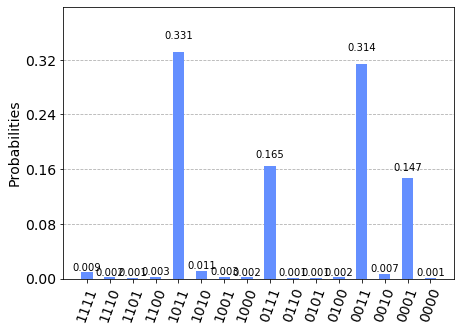

In [6]:
plot_histogram(counts,sort='desc')